In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PlayerDetail.csv to PlayerDetail (1).csv


Load and Clean the Data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('PlayerDetail.csv', sep = ',')
df.head()

,Player#,Sport,Day,Start time,Duration,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Muscle load,Perceived load,Player's estimate (RPE),Team_Role
0,2,Soccer,08/13/2018,9:32:22,1:52:23,5.25,148,218.0,2.8,25.1,1333.0,29,228,176,0.0,NaN,NaN,Defender
1,2,Soccer,9/5/2019,15:33:22,1:12:50,3.47,135,187.0,2.9,27.0,726.0,36,101,80,NaN,NaN,NaN,Defender
2,2,Soccer,9/6/2019,16:53:36,2:12:03,10.25,159,218.0,4.7,29.1,1789.0,26,310,258,NaN,NaN,NaN,Defender
3,2,Soccer,9/8/2019,11:32:45,2:11:15,10.16,154,196.0,4.6,30.3,1646.0,26,285,233,NaN,NaN,NaN,Defender
4,2,Soccer,9/10/2019,15:32:19,0:56:33,2.45,128,178.0,2.6,22.1,496.0,39,63,51,NaN,NaN,NaN,Defender


In [ ]:
df.dtypes

Player#                             int64
Sport                              object
Day                                object
Start time                         object
Duration                           object
Distance (km)                     float64
Average heart rate (bpm)            int64
Maximum heart rate (bpm)          float64
Average speed(km/h)               float64
Speed max(km/h)                   float64
Calories                          float64
Fat percentage of calories (%)      int64
Training load                       int64
Cardio load                         int64
Muscle load                       float64
Perceived load                    float64
Player's estimate (RPE)           float64
Team_Role                          object
dtype: object

In [ ]:
df.shape

(2784, 18)

In [ ]:
df.describe()

,Player#,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Muscle load,Perceived load,Player's estimate (RPE)
count,2784.000000,2784.000000,2784.000000,2782.000000,2784.000000,2784.000000,2783.000000,2784.000000,2784.000000,2784.000000,33.0,0.0,0.0
mean,15.588721,5.947863,133.065733,203.903666,3.586889,27.362141,863.094502,35.205819,123.631106,109.031609,0.0,NaN,NaN
std,9.282721,17.547702,17.290556,22.817020,3.545314,11.286648,465.017866,11.326993,84.323910,70.075262,0.0,NaN,NaN
min,2.000000,0.000000,0.000000,62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
25%,8.000000,3.410000,123.000000,188.000000,2.700000,24.500000,571.000000,28.000000,66.750000,65.000000,0.0,NaN,NaN
50%,12.000000,4.805000,134.000000,206.000000,3.300000,27.200000,828.000000,34.000000,110.000000,98.500000,0.0,NaN,NaN
75%,23.000000,6.270000,144.000000,223.000000,4.000000,30.000000,1094.000000,41.000000,166.000000,142.000000,0.0,NaN,NaN
max,35.000000,461.210000,212.000000,239.000000,74.300000,130.900000,5536.000000,80.000000,1024.000000,937.000000,0.0,NaN,NaN


In [ ]:
df.isnull().sum(axis = 0) 
# We can see the Total row is 2570, the three columns: Muscle load, Perceived load and 
#Player's estimate (RPE) has the most null or missing values.

Player#                              0
Sport                                0
Day                                  0
Start time                           0
Duration                             0
Distance (km)                        0
Average heart rate (bpm)             0
Maximum heart rate (bpm)             2
Average speed(km/h)                  0
Speed max(km/h)                      0
Calories                             1
Fat percentage of calories (%)       0
Training load                        0
Cardio load                          0
Muscle load                       2751
Perceived load                    2784
Player's estimate (RPE)           2784
Team_Role                            0
dtype: int64

In [ ]:
df.drop(['Muscle load', 'Perceived load', "Player's estimate (RPE)", "Sport"], axis=1, inplace = True)
# we know that this is for soccer analysis, so the sport column is not helpful, we can drop it/
df.head()

,Player#,Day,Start time,Duration,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Team_Role
0,2,08/13/2018,9:32:22,1:52:23,5.25,148,218.0,2.8,25.1,1333.0,29,228,176,Defender
1,2,9/5/2019,15:33:22,1:12:50,3.47,135,187.0,2.9,27.0,726.0,36,101,80,Defender
2,2,9/6/2019,16:53:36,2:12:03,10.25,159,218.0,4.7,29.1,1789.0,26,310,258,Defender
3,2,9/8/2019,11:32:45,2:11:15,10.16,154,196.0,4.6,30.3,1646.0,26,285,233,Defender
4,2,9/10/2019,15:32:19,0:56:33,2.45,128,178.0,2.6,22.1,496.0,39,63,51,Defender


In [ ]:
df['Day'] =  pd.to_datetime(df['Day'], infer_datetime_format=True)
df.head()

,Player#,Day,Start time,Duration,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Team_Role
0,2,2018-08-13,9:32:22,1:52:23,5.25,148,218.0,2.8,25.1,1333.0,29,228,176,Defender
1,2,2019-09-05,15:33:22,1:12:50,3.47,135,187.0,2.9,27.0,726.0,36,101,80,Defender
2,2,2019-09-06,16:53:36,2:12:03,10.25,159,218.0,4.7,29.1,1789.0,26,310,258,Defender
3,2,2019-09-08,11:32:45,2:11:15,10.16,154,196.0,4.6,30.3,1646.0,26,285,233,Defender
4,2,2019-09-10,15:32:19,0:56:33,2.45,128,178.0,2.6,22.1,496.0,39,63,51,Defender


Task 1: examine the weekly workload numbers for these individuals and average them out.

In [ ]:
df['week']  = df.Day.dt.week
df['month'] = df.Day.dt.month
df['year']  = df.Day.dt.year
df = df.sort_values(by=['Day'], ascending=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,Player#,Day,Start time,Duration,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Team_Role,week,month,year
0,2,2018-08-13,9:32:22,1:52:23,5.25,148,218.0,2.8,25.1,1333.0,29,228,176,Defender,33,8,2018
977,11,2018-08-28,15:27:13,1:48:53,5.69,148,192.0,3.1,30.4,1282.0,27,223,178,Midfielder,35,8,2018
978,11,2018-08-29,15:28:55,1:55:13,4.02,109,181.0,2.1,27.4,732.0,44,80,75,Midfielder,35,8,2018
979,11,2018-08-30,17:43:41,2:08:36,8.73,153,189.0,4.1,32.5,1612.0,26,288,235,Midfielder,35,8,2018
980,11,2018-09-01,14:07:00,2:15:53,6.08,150,223.0,2.9,37.8,1309.0,31,227,198,Midfielder,35,9,2018


In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Player#', 'Day', 'Start_time', 'Duration', 'Distance_(km)',
       'Average_heart_rate_(bpm)', 'Maximum_heart_rate_(bpm)',
       'Average_speed(km/h)', 'Speed_max(km/h)', 'Calories',
       'Fat_percentage_of_calories_(%)', 'Training_load', 'Cardio_load',
       'Team_Role', 'week', 'month', 'year'],
      dtype='object')

In [ ]:
player = int(input("Enter a Player's number: "))

df2 = pd.DataFrame(df.loc[(df['Player#'] == player),['year','week','Training_load','Cardio_load']])
df2 = round(df2.groupby(['year','week']).mean(),2)
df2
# We can see the mean of training_load and cardio_load for different year and week; for the year, we have 2018 to 2022.

Enter a Player's number: 2


Training_load  Cardio_load
year week                            
2018 33           228.00       176.00
2019 36           232.00       190.33
     37           175.20       145.20
     38           144.80       121.80
     39           149.20       126.20
     40           118.33       102.67
     47           107.00        84.00
     48           148.00       132.50
2020 3             23.00        25.00
     4            112.00        93.00
     6            197.50       154.50
     7            215.00       173.00
     8            129.00       102.00
     9            146.00       111.00
     10           127.00       100.67
2021 3            190.00       151.75
     4            213.00       169.75
     5            149.60       119.20
     6            172.25       138.25
     7            128.75       107.25
     8            122.00       102.50
     9            124.40       103.20
     10           103.60        84.80
     11            68.33        59.00
     12           192.20       154.80
     13           176.00       144.00
     14           345.75       318.00
     15            78.50        74.25
     16           284.25       238.75
     32           147.00       114.33
     33            84.20        69.60
     34           112.00        87.75
     35           173.20       141.20
     36           106.71        85.00
     37           114.83        92.33
     38           165.00       130.33
     39           207.00       161.50
     43           105.50        79.50
     44           138.00       115.00
     45            84.50        67.50
     46           120.33        94.17
2022 2            148.25       113.75
     3             68.00        56.33
     4            114.67        88.00
     5             52.00        37.00
     6             92.00        73.25
     7             41.00        37.00
     8            122.50       100.50
     9            130.75       106.00
     11           118.20        93.80
     12            97.33        77.33
     13            19.00        13.00

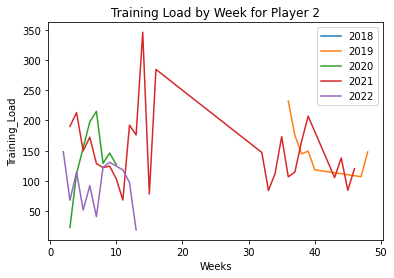

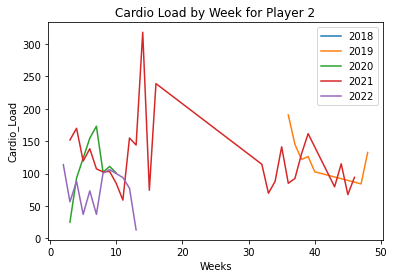

In [ ]:
df2 = df2.reset_index() 
year_list = df2.year.unique()

for i in year_list:
    selection = (df2['year'] == i)
    weeks = list(df2['week'][selection])
    Training_load = list(df2['Training_load'][selection])
    plt.plot(weeks, Training_load)
plt.xlabel('Weeks')
plt.ylabel('Training_Load')
plt.title('Training Load by Week for Player ' + str(player))
plt.legend(year_list)
plt.show()

for i in year_list:
    selection = (df2['year'] == i)
    weeks = list(df2['week'][selection])
    Cardio_load = list(df2['Cardio_load'][selection])
    plt.plot(weeks, Cardio_load)

plt.xlabel('Weeks')
plt.ylabel('Cardio_Load')
plt.title('Cardio Load by Week for Player ' + str(player))
plt.legend(year_list)
plt.show()

In [ ]:
player = int(input("Enter a Player's number: "))

df3 = pd.DataFrame(df.loc[(df['Player#'] == player),['year','month','Training_load','Cardio_load']])
df3 = round(df3.groupby(['year','month']).mean(),2)
df3
# We can see the mean of training_load and cardio_load for different year and month eek; for the year, we have 2018 to 2022.

Enter a Player's number: 2


Training_load  Cardio_load
year month                            
2018 8             228.00       176.00
2019 9             169.00       140.94
     10            118.33       102.67
     11            134.33       116.33
2020 1              94.20        79.40
     2             177.00       139.00
     3             127.00       100.67
2021 1             201.50       160.75
     2             143.53       116.94
     3             121.90       100.20
     4             243.29       213.36
     8             110.76        88.19
     9             132.90       106.86
     10            159.00       121.67
     11            120.25        96.67
2022 1             108.45        84.09
     2              84.38        68.62
     3             117.00        93.33

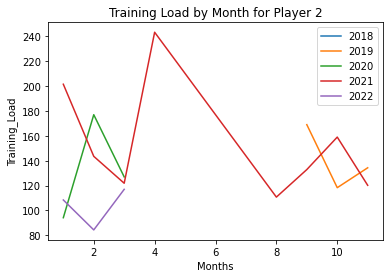

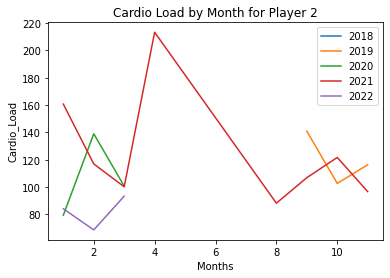

In [ ]:
df3 = df3.reset_index() 
year_list = df3.year.unique()

for i in year_list:
    selection = (df3['year'] == i)
    months = list(df3['month'][selection])
    Training_load = list(df3['Training_load'][selection])
    plt.plot(months, Training_load)
plt.xlabel('Months')
plt.ylabel('Training_Load')
plt.title('Training Load by Month for Player ' + str(player))
plt.legend(year_list)
plt.show()

for i in year_list:
    selection = (df3['year'] == i)
    months = list(df3['month'][selection])
    Cardio_load = list(df3['Cardio_load'][selection])
    plt.plot(months, Cardio_load)

plt.xlabel('Months')
plt.ylabel('Cardio_Load')
plt.title('Cardio Load by Month for Player ' + str(player))
plt.legend(year_list)
plt.show()

Task 2: split the members up based on whether they are F (forward), D (defender), or M (midfielder) and examine and average the workloads for these three positions.

In [ ]:
df4 = pd.DataFrame(df.loc[:,['Team_Role','Training_load','Cardio_load']])
df4 = round(df4.groupby('Team_Role').mean(), 2)
df4

,Training_load,Cardio_load
Team_Role,,
Defender,141.52,119.61
Forward,90.15,89.60
Goalkeeper,37.00,29.40
Midfielder,128.25,111.70


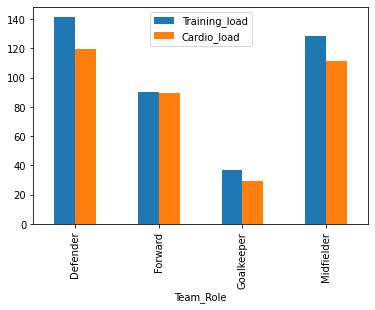

In [ ]:
df4.plot(kind='bar')

Acute Chronic Workload Ratio

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df5 = pd.read_excel('ACworkload.xlsx', usecols="A:J")

df5['Day'] =  pd.to_datetime(df5['Day'], infer_datetime_format=True)
df5 = df5.sort_values(by=['Day'], ascending=True)

df5['year']  = df5.Day.dt.year
df5['week']  = df5.Day.dt.week

df5.head()

FileNotFoundError: ignored

In [ ]:
player = int(input("Enter a Player's number: "))

df6 = pd.DataFrame(df5.loc[(df5['Player#'] == player),['year','week','Training load']])
df6 = round(df6.groupby(['year','week']).mean(),2)
df6

In [ ]:
df7 = df6.reset_index()
df7["ACWL"] = ""
for i in range(4, len(df7)):
    selection = df7.iloc[(i-4):i, [2]]
    df7["ACWL"][i] = float((df7["Training load"][i])/selection.mean())
df7

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df8 = pd.read_excel("Men's Soccer 2022 Fall Team Roster and Notes.xlsx", sheet_name = 'Injury History', usecols="A:H")

df9 = pd.read_excel("Men's Soccer 2022 Fall Team Roster and Notes.xlsx", sheet_name = 'Injury History', usecols="A:D,I:L")
df9 = df9.rename(columns={"Injury.1": "Injury", "Date.1": "Date", "Contact?.1": "Contact?", "Notes.1": "Notes"})

df10 = pd.read_excel("Men's Soccer 2022 Fall Team Roster and Notes.xlsx", sheet_name = 'Injury History', usecols="A:D,M:P")
df10 = df10.rename(columns={"Injury.2": "Injury", "Date.2": "Date", "Contact?.2": "Contact?", "Notes.2": "Notes"})

df11 = pd.concat([df8, df9, df10], axis=0)
df11

In [ ]:
df12 = df11[df11.Injury.notnull()]
df12 = df12[df12.Date.notnull()]

df12 = df12.sort_values(by=['#'], ascending=True)

df12

Graphically Summarize the Data

In [ ]:
df.dtypes

In [ ]:
import seaborn as sns
#Pair plot continuous features
#Disable all warnings in Juyter notebook
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

sns.pairplot(df[['Distance_(km)', 'Average_heart_rate_(bpm)', 'Maximum_heart_rate_(bpm)',
'Speed_max(km/h)','Calories','Fat_percentage_of_calories_(%)','Training_load','Cardio_load']], diag_kind='kde')

In [ ]:
df.corr()

Analysis for Questionnaire

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ques = pd.read_excel('Questionnaire.xlsx')
ques.head()

In [ ]:
ques.Sore.value_counts(dropna=False)

In [ ]:
ques.Injury.value_counts(dropna=False)

In [ ]:
ques.TOTAL.value_counts(dropna=False)